# EDA - Iris Flower Dataset

```
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species
```

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [4]:
df_original = pd.read_csv("./dataset/iris.csv")

## Understanding the data: Basic EDA

In [5]:
df_original.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df_original.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df_original.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df_original.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df_original.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [11]:
df_original.shape

(150, 6)

In [12]:
df_original.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [13]:
df_original["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
df_original.drop(columns=["Id"], inplace=True)

In [15]:
numeric_col = [c for c in df_original.columns if c != "Species"]
categorical_col = ["Species"]
target_col = "Species"

numeric_col, categorical_col, target_col

(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
 ['Species'],
 'Species')

Basic EDA Analysis:

* Shape = (150, 6)
* No Missing Values
* Numerical Columns: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
* Categorical Column: ['Species']
* dtypes: float64(4), int64(1), object(1)

## Univariate Analysis

### Numerical Columns

dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])


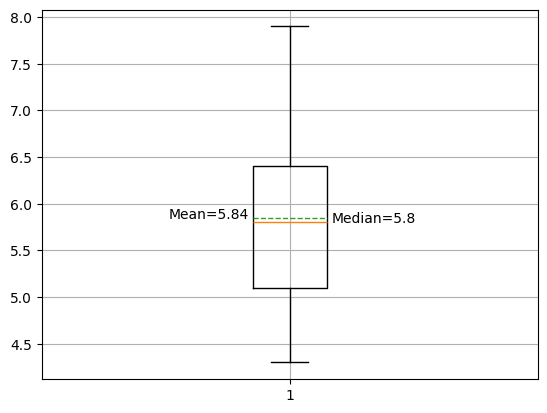

In [16]:
output = plt.boxplot(df_original["SepalLengthCm"], meanline=True, showmeans=True)
print(output.keys())
info = df_original["SepalLengthCm"].describe()
median = df_original["SepalLengthCm"].median()
mean = df_original["SepalLengthCm"].mean()
for line in output["medians"] :
    x, y = line.get_xydata()[1]
    plt.annotate(f"Median={median}", [x+0.01, y])

for line in output["means"] :
    x, y = line.get_xydata()[0]
    plt.annotate(f"Mean={mean:.2f}", [x-0.17, y])

plt.grid(True)

In [47]:
def boxplots(dataframe: pd.DataFrame, numeric_features: list, target: str, ncols: int=5, nrows: int=5, figsize: tuple=(10,10)) :
    """
     Generates a box plot for all the numeric features present in your dataframe
    """

    fig = plt.figure(figsize=figsize)

    for i, col in enumerate(numeric_features) :
        ax = fig.add_subplot(nrows, ncols, i+1)
        sns.boxplot(data=dataframe, x=col, hue=target, orient='h', ax=ax)
        ax.set_title(col)

    fig.suptitle("Box Plots of Numeric Columns")
    fig.tight_layout()
    plt.show()

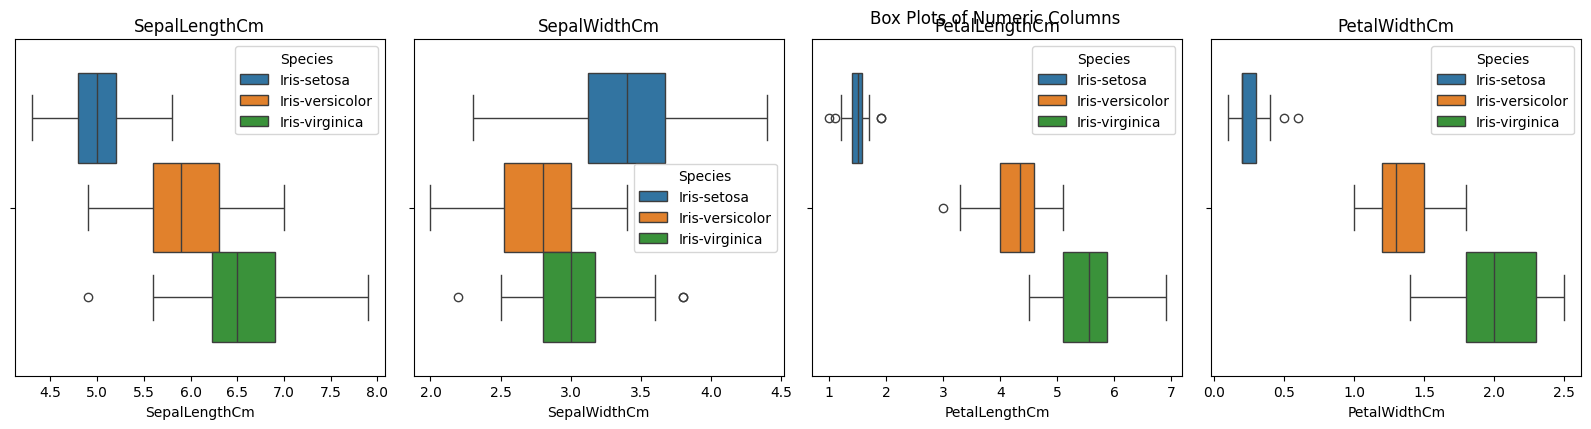

In [51]:
boxplots(df_original, numeric_col, target=target_col, figsize=(20,20))

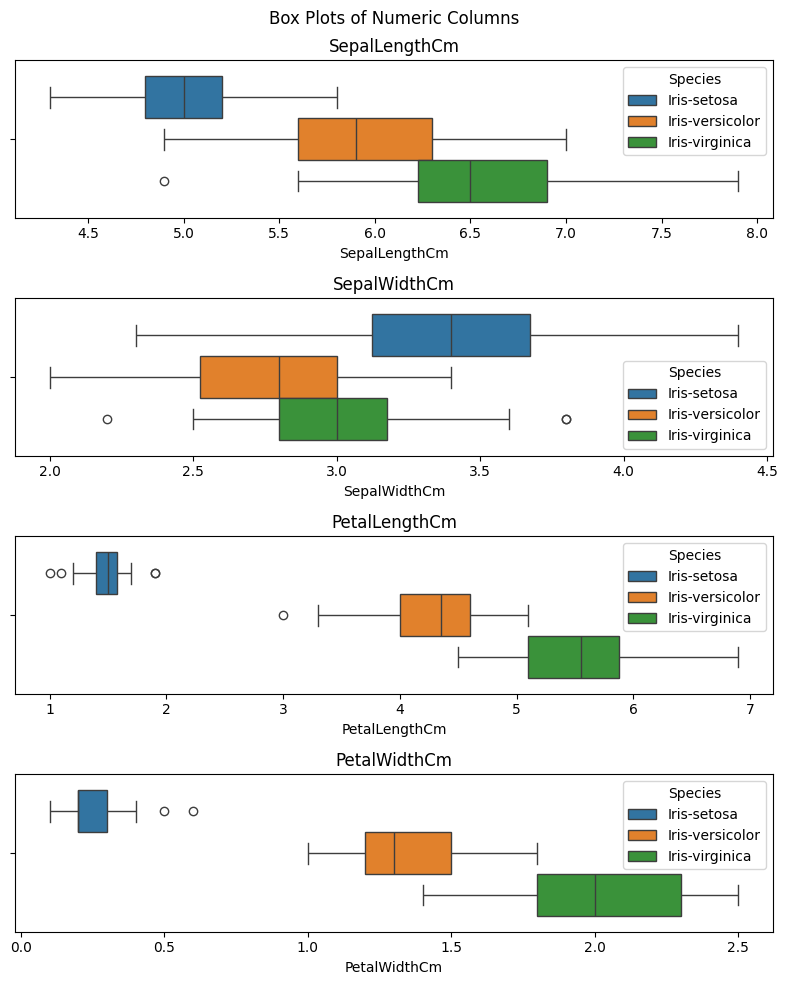

In [18]:
fig, ax = plt.subplots(ncols=1, nrows=len(numeric_col), figsize=(8 ,10))

for i, col in enumerate(numeric_col) :
    sns.boxplot(data=df_original, x=col, hue="Species", orient='h', ax=ax[i])
    ax[i].set_title(col)

fig.suptitle("Box Plots of Numeric Columns")
fig.tight_layout()

In [44]:
def histplots(dataframe: pd.DataFrame, numeric_features: list, target: str, ncols: int=5, nrows: int=5, figsize: tuple=(10,10)) :
    """
     Generates a box plot for all the numeric features present in your dataframe
    """

    fig = plt.figure(figsize=figsize)

    for i, col in enumerate(numeric_features) :
        ax = fig.add_subplot(nrows, ncols, i+1)
        sns.histplot(data=dataframe, x=col, ax=ax, kde=True, color="blue", hue=target)
        ax.set_title(col)

    fig.suptitle("Distribution of Numeric Columns")
    fig.tight_layout()
    plt.show()

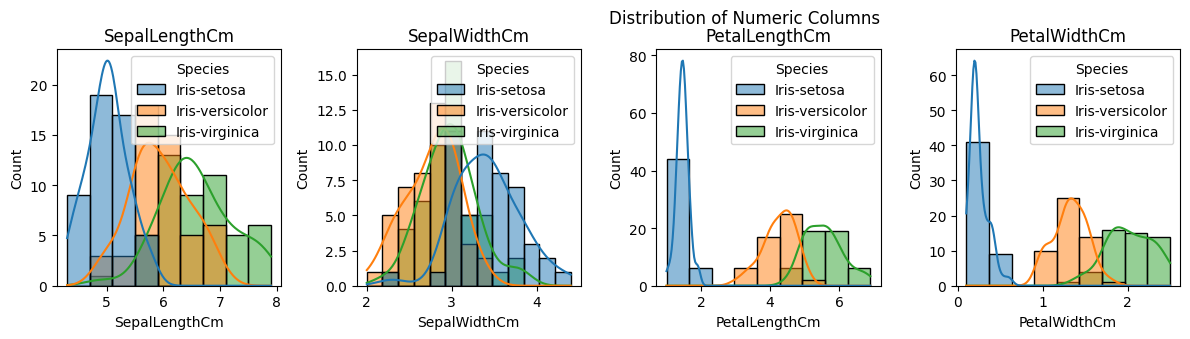

In [46]:
histplots(df_original, numeric_col, target=target_col, figsize=(15,15))

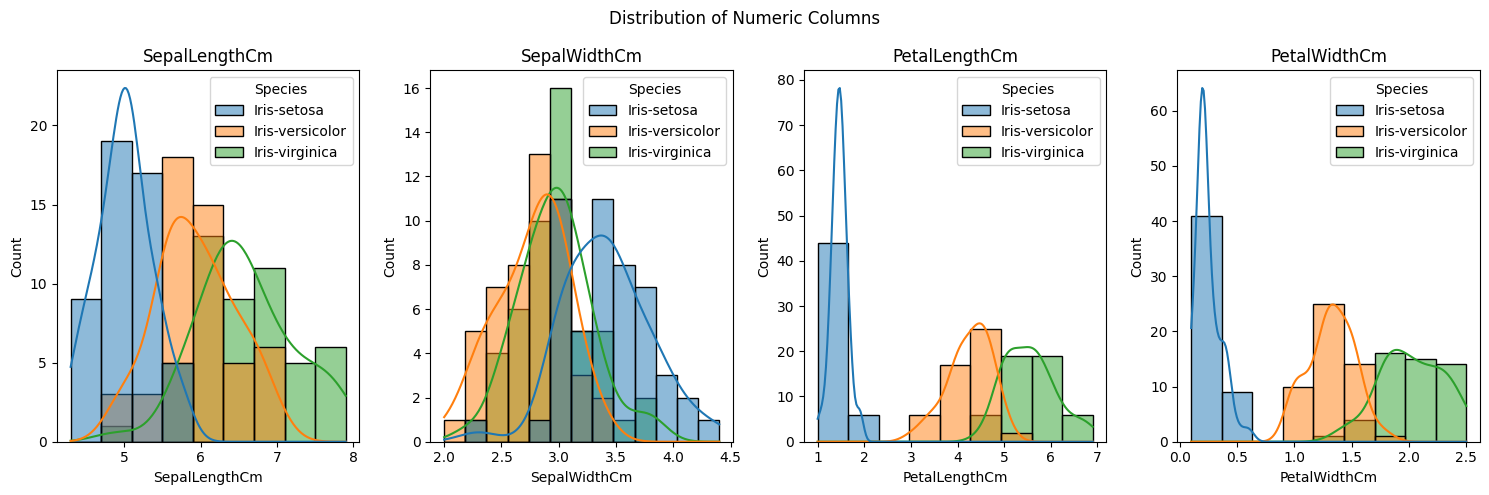

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=len(numeric_col), figsize=(15 ,5))

for i, col in enumerate(numeric_col) :    
    sns.histplot(data=df_original, x=col, ax=ax[i], kde=True, color="blue", hue="Species")
    ax[i].set_title(col)

fig.suptitle("Distribution of Numeric Columns")
fig.tight_layout()

### Categorical Columns

In [20]:
target_col = categorical_col[0]
target_col

'Species'

In [21]:
df_original[target_col].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='Species', ylabel='count'>

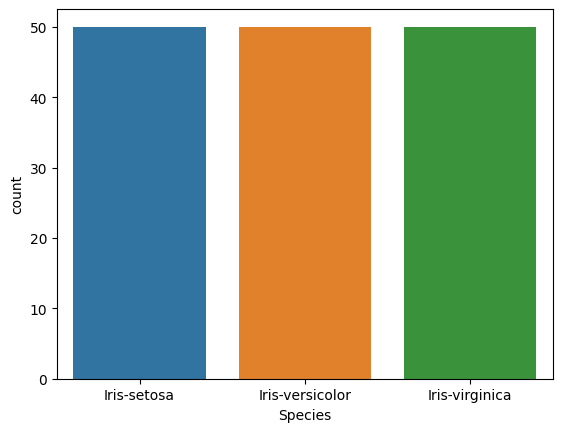

In [52]:
sns.countplot(data=df_original, x=f"{target_col}", hue=target_col)

## Bivariate Analysis

### Numeric vs Numeric

Text(0.5, 1.0, 'Correlation Heatmap Matrix')

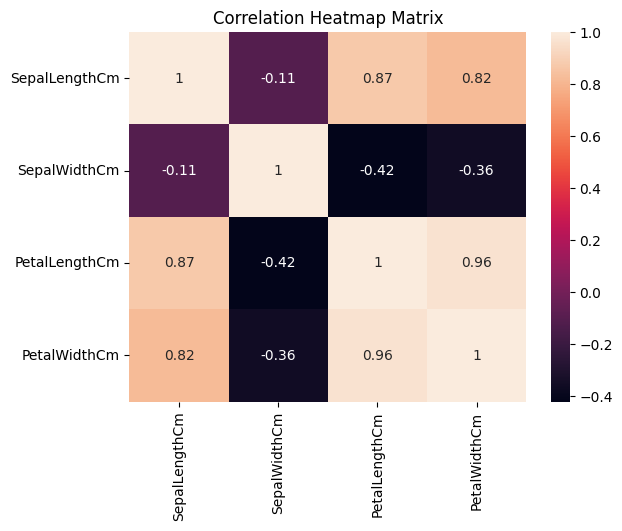

In [60]:
sns.heatmap(df_original.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap Matrix")

### Categorical vs Numeric

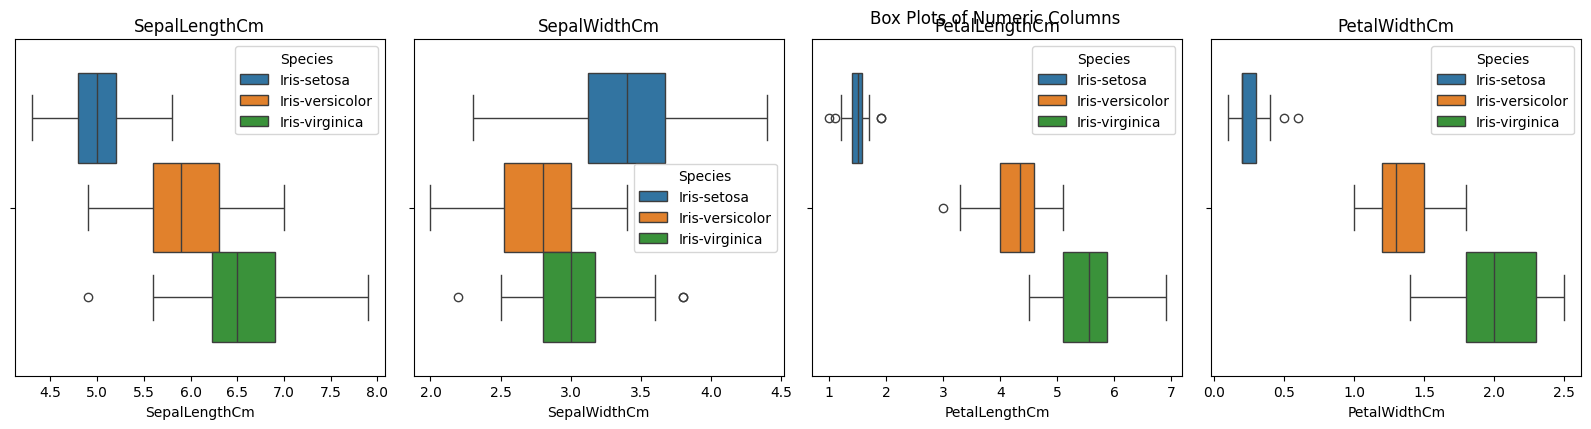

In [62]:
boxplots(df_original, numeric_col, target_col, figsize=(20,20))

In [64]:
def violinplots(dataframe: pd.DataFrame, numeric_features: list, target: str, ncols: int=5, nrows: int=5, figsize: tuple=(10,10)) :
    """
     Generates a box plot for all the numeric features present in your dataframe
    """

    fig = plt.figure(figsize=figsize)

    for i, col in enumerate(numeric_features) :
        ax = fig.add_subplot(nrows, ncols, i+1)
        sns.violinplot(data=dataframe, x=col, hue=target, orient='h', ax=ax)
        ax.set_title(col)

    fig.suptitle("Box Plots of Numeric Columns")
    fig.tight_layout()
    plt.show()

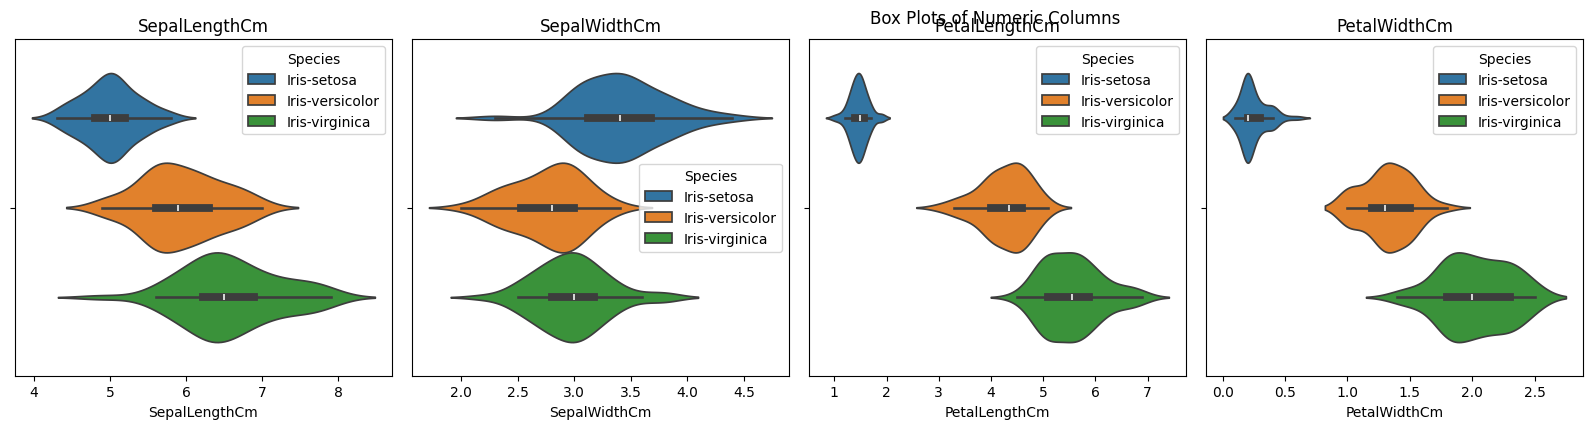

In [65]:
violinplots(df_original, numeric_col, target_col, figsize=(20,20))

In [66]:
def stripplots(dataframe: pd.DataFrame, numeric_features: list, target: str, ncols: int=5, nrows: int=5, figsize: tuple=(10,10)) :
    """
     Generates a box plot for all the numeric features present in your dataframe
    """

    fig = plt.figure(figsize=figsize)

    for i, col in enumerate(numeric_features) :
        ax = fig.add_subplot(nrows, ncols, i+1)
        sns.stripplot(data=dataframe, x=col, hue=target, orient='h', ax=ax)
        ax.set_title(col)

    fig.suptitle("Box Plots of Numeric Columns")
    fig.tight_layout()
    plt.show()

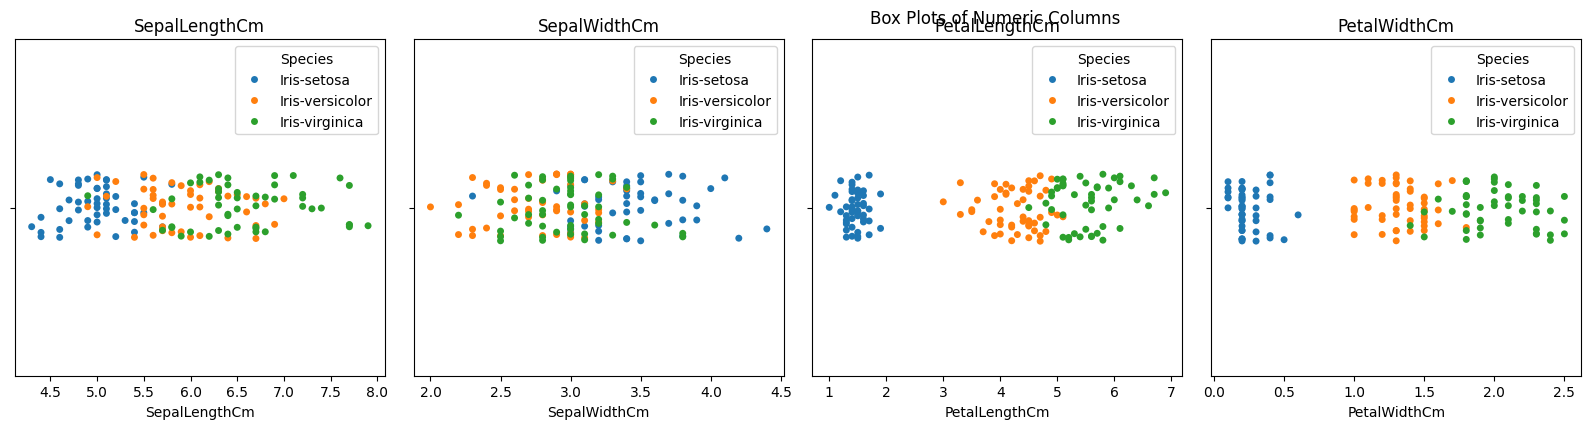

In [67]:
stripplots(df_original, numeric_col, target_col, figsize=(20,20))

### Categorical vs Categorical: Nothing in Iris DataSet

## Multivariate Analysis

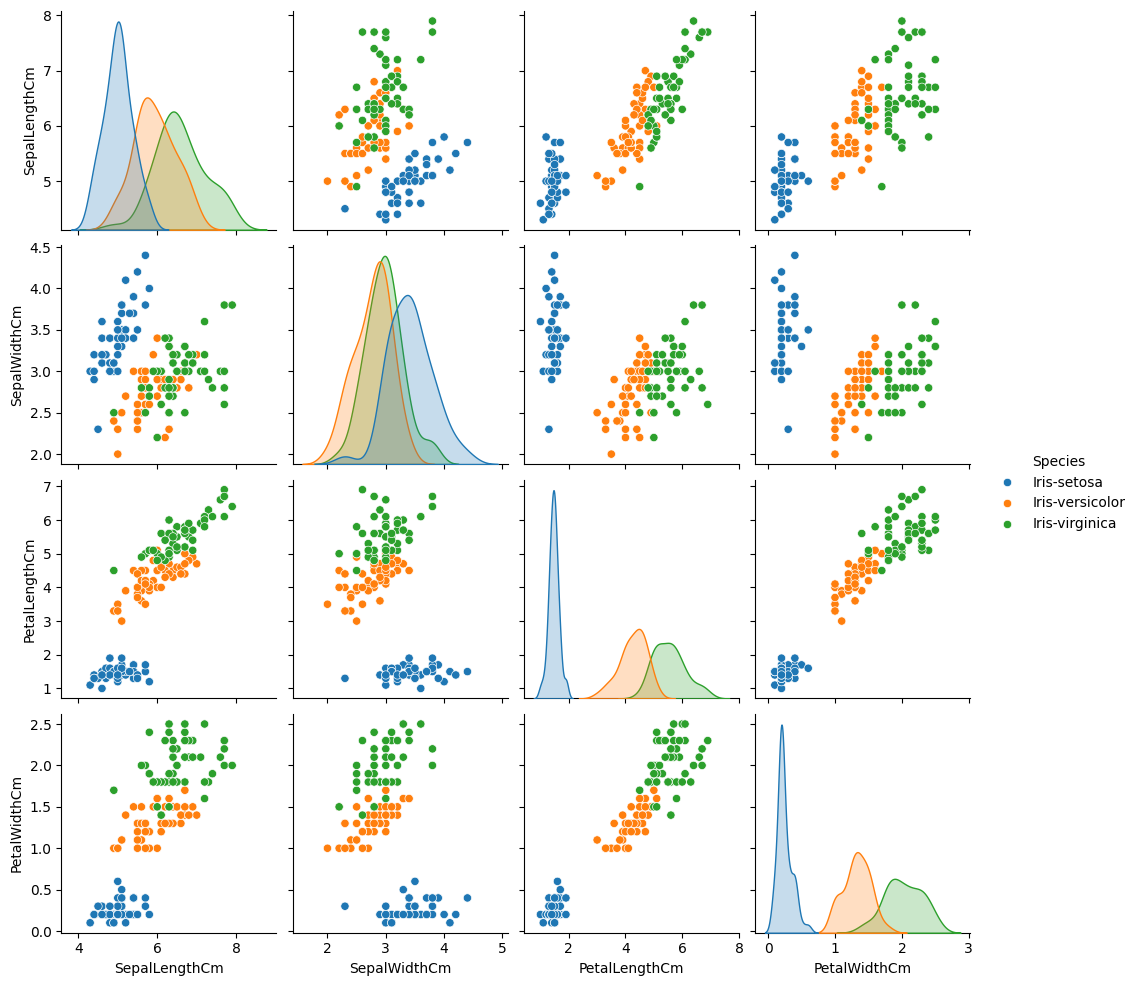

In [75]:
sns.pairplot(df_original, hue=target_col, kind="scatter")

Text(0.5, 1.0, 'Correlation Heatmap Matrix')

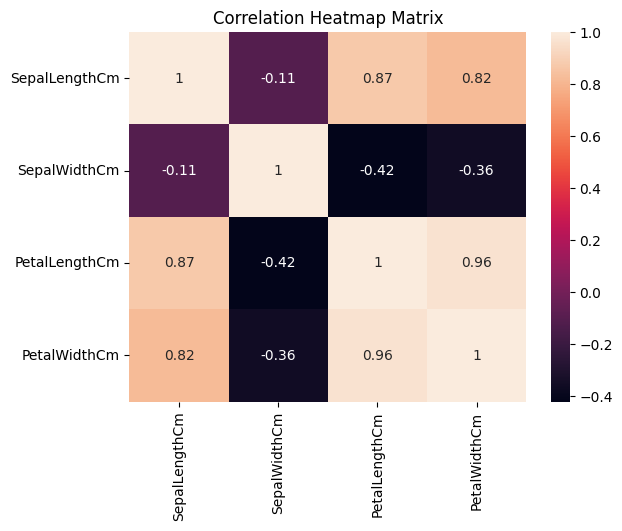

In [76]:
sns.heatmap(df_original.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap Matrix")

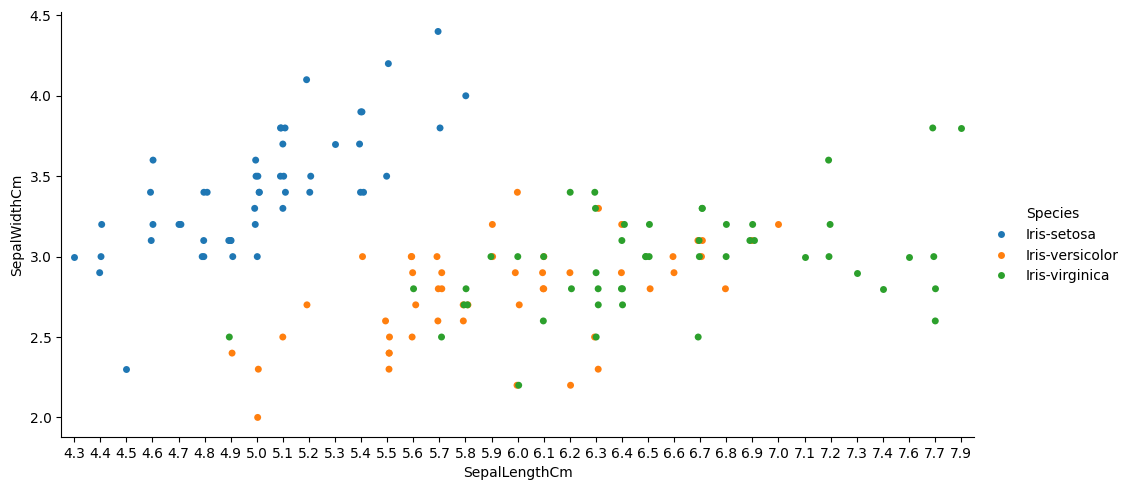

In [81]:
sns.catplot(df_original, x="SepalLengthCm", y="SepalWidthCm", hue=target_col, height=5, aspect=2.0)

## Outlier Detection

### Univariate Analysis

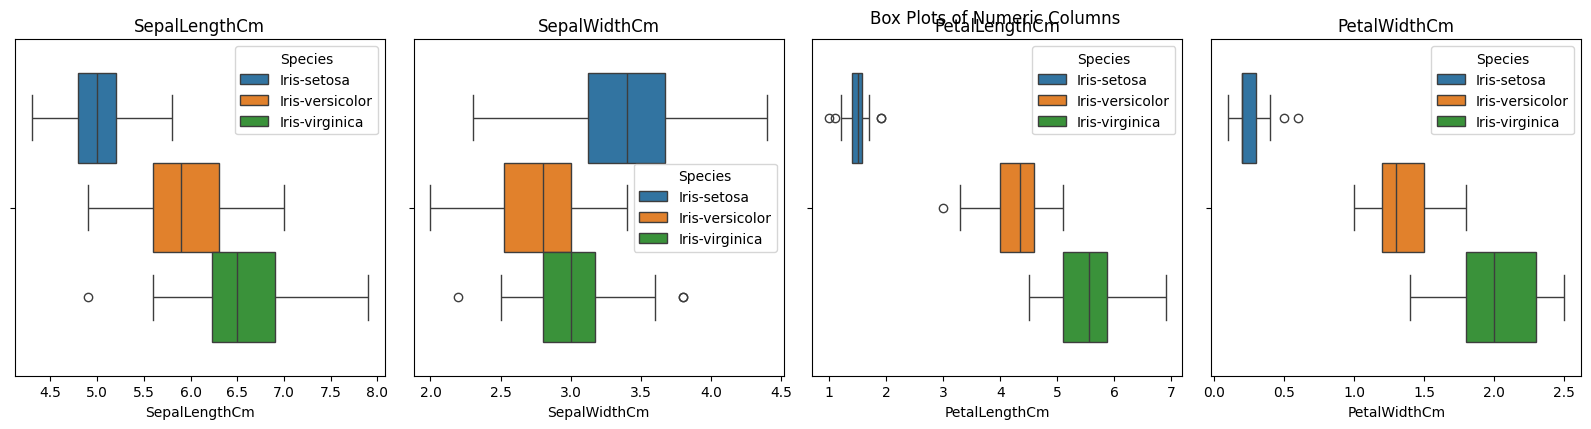

In [86]:
boxplots(df_original, numeric_col, target_col, figsize=(20,20))

In [ ]:
from scipy.stats import zscore